# Gravitational Wave data and their processing

## Author

**Author:** [Elena Cuoco]

**GitHub:** [@elenacuoco](https://github.com/elenacuoco)

**Contact:** [elena.cuoco@ego-gw.it]

 


## Which kind of data are Gravitational Wave detector data?

The output of a gravitational wave detector is typically represented as a strain time series. Strain refers to the fractional change in length of the detector's arms caused by the passing gravitational wave. The strain time series provides a detailed record of the amplitude, frequency, and duration of the detected gravitational wave signal. 
Analyzing the time series data obtained from gravitational wave detectors involves several steps. First, the raw data must be processed and filtered to remove noise, instrumental artifacts, and environmental disturbances. Various algorithms and techniques are employed to enhance the signal-to-noise ratio and extract the gravitational wave signal from the data. 
The time series data also provides valuable information about the properties of the source that generated the gravitational wave. By comparing the observed signal with theoretical models, scientists can infer the masses, spins, and orbital parameters of the binary system that produced the waves. This information helps deepen our understanding of astrophysical processes, such as the formation and evolution of black holes and neutron stars.Moreover, the continuous monitoring of gravitational wave data over time allows scientists to search for transient events and study their statistical properties. By analyzing the distribution of events and their occurrence rates, researchers can gain insights into the astrophysical populations that produce gravitational waves.

We will examine in the following steps how to read, plot, preprocess, transform and prepare a GW data set for Machine Learning application.

### Reference for the material used in this notebook:
    - https://github.com/jkanner/gw-intro
    - https://gwosc.org/

# Whitening procedure

The purpose of whitening is to modify the data such that the noise is spectrally flat, meaning it has an equal amount of power across all frequencies. This is done by applying a filter that compensates for the frequency-dependent response of the detector. The whitening process significantly improves the sensitivity of the detectors, enabling scientists to extract weak signals from the noise and identify potential gravitational wave events.
Whitening can be done using techniques in frequency domain or in time-domain.

* ### Whitening in frequency domain
    The whitening process involves several steps. First, the data is transformed into the frequency domain using techniques such as fast Fourier transforms (FFT). Then, the noise spectrum is estimated by analyzing the power spectral density of the data. This spectrum represents the distribution of noise power across different frequencies.
Next, an inverse filter is applied to the data, which modifies the spectrum of the signal to flatten the noise. Essentially, the inverse filter boosts or attenuates specific frequency components to compensate for the frequency-dependent response of the detector. This equalization allows gravitational wave signals to be more easily distinguished from the noise.
After the whitening procedure, the data is transformed back into the time domain, where it undergoes further analysis and searches for gravitational wave signals using sophisticated algorithms.

* ### Whitening in time domain
The parametric estimator for whitening in the time domain involves selecting a noise model, estimating its parameters from the data, and subtracting or filtering out the estimated noise component. 
In the time domain, a parametric estimator assumes a specific mathematical model or functional form for the noise. This model is typically characterized by a set of parameters that are estimated from the data. 
By fitting the model to the data, the parameters are determined, and the noise can be whitened by removing the estimated noise component. To apply a parametric estimator for whitening in the time domain, the first step is to select an appropriate model for the noise. Common choices include autoregressive (AR) models, 
autoregressive moving average (ARMA) models. These models capture different properties of the noise, such as its autocorrelation and spectral characteristics. 
Once the model is selected, the parameters of the model are estimated from the data. This estimation is typically done using methods such as maximum likelihood estimation (MLE) or least squares fitting. 
The estimated parameters describe the noise component that needs to be removed or filtered from the data. After estimating the parameters, the parametric estimator is applied to the data. The estimated noise component is subtracted or filtered out from the original data, leaving behind a whitened version of the data. This whitened data has reduced noise correlations and a more constant power spectral density, which enhances the detectability of gravitational wave signals. It's important to note that the effectiveness of the parametric estimator depends on the accuracy of the chosen noise model and the quality of the parameter estimation. If the model is a good fit for the noise characteristics and the parameter estimation is reliable, the whitening procedure can significantly improve the sensitivity of gravitational wave analysis. However, it's worth mentioning that the choice of parametric models and their applicability to gravitational wave search can be challenging. The noise in gravitational wave detectors often exhibits complex and non-stationary behavior, which may require more sophisticated modeling approaches or combinations of different models.
While less commonly used compared to the frequency domain non-parametric methods, the parametric approach can be valuable in specific scenarios where the noise characteristics are well-modeled by the chosen parametric model.  It provides an alternative approach to whitening in gravitational wave search, aiming to enhance the detectability of gravitational wave signals by reducing noise correlations and improving the data quality.


## GW data before and after the whitening
In the following tutorial we will use the FFT whitening used in the GW community, contained in gwpy package. If you are interested also in time domain solution, you can have a look
at these packages:
* https://github.com/elenacuoco/p4TSA
* https://wdfpipe.gitlab.io/


### Install some libraries

In [1]:
# Import necessary libraries
import requests  # For making HTTP requests
import os       # For interacting with the file system
import matplotlib.pyplot as plt  # For plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Configuring the display format for figures

# Try to import the TimeSeries class from the gwpy.timeseries module
try:
    from gwpy.timeseries import TimeSeries
except ImportError:
    # If the import fails, install the 'gwpy' library and 'matplotlib' library using pip
    ! pip install -q "gwpy"
    ! pip install -q "matplotlib"
    # Then, import the TimeSeries class from gwpy.timeseries
    from gwpy.timeseries import TimeSeries

### Retrieve some data directly from GOWSC portal

In [2]:
# -- Set a GPS time:
t0 = 1126259462.4    # -- GW150914

#-- Choose detector as H1, L1, or V1
detector = 'H1'

# Fetch strain data for detector 'H1' from t0-16 to t0+16 seconds (32 seconds of data) without caching
data = TimeSeries.fetch_open_data('H1', t0-16, t0+16, sample_rate=4096,cache=False)


 


### Plot the data around the GW event

32768


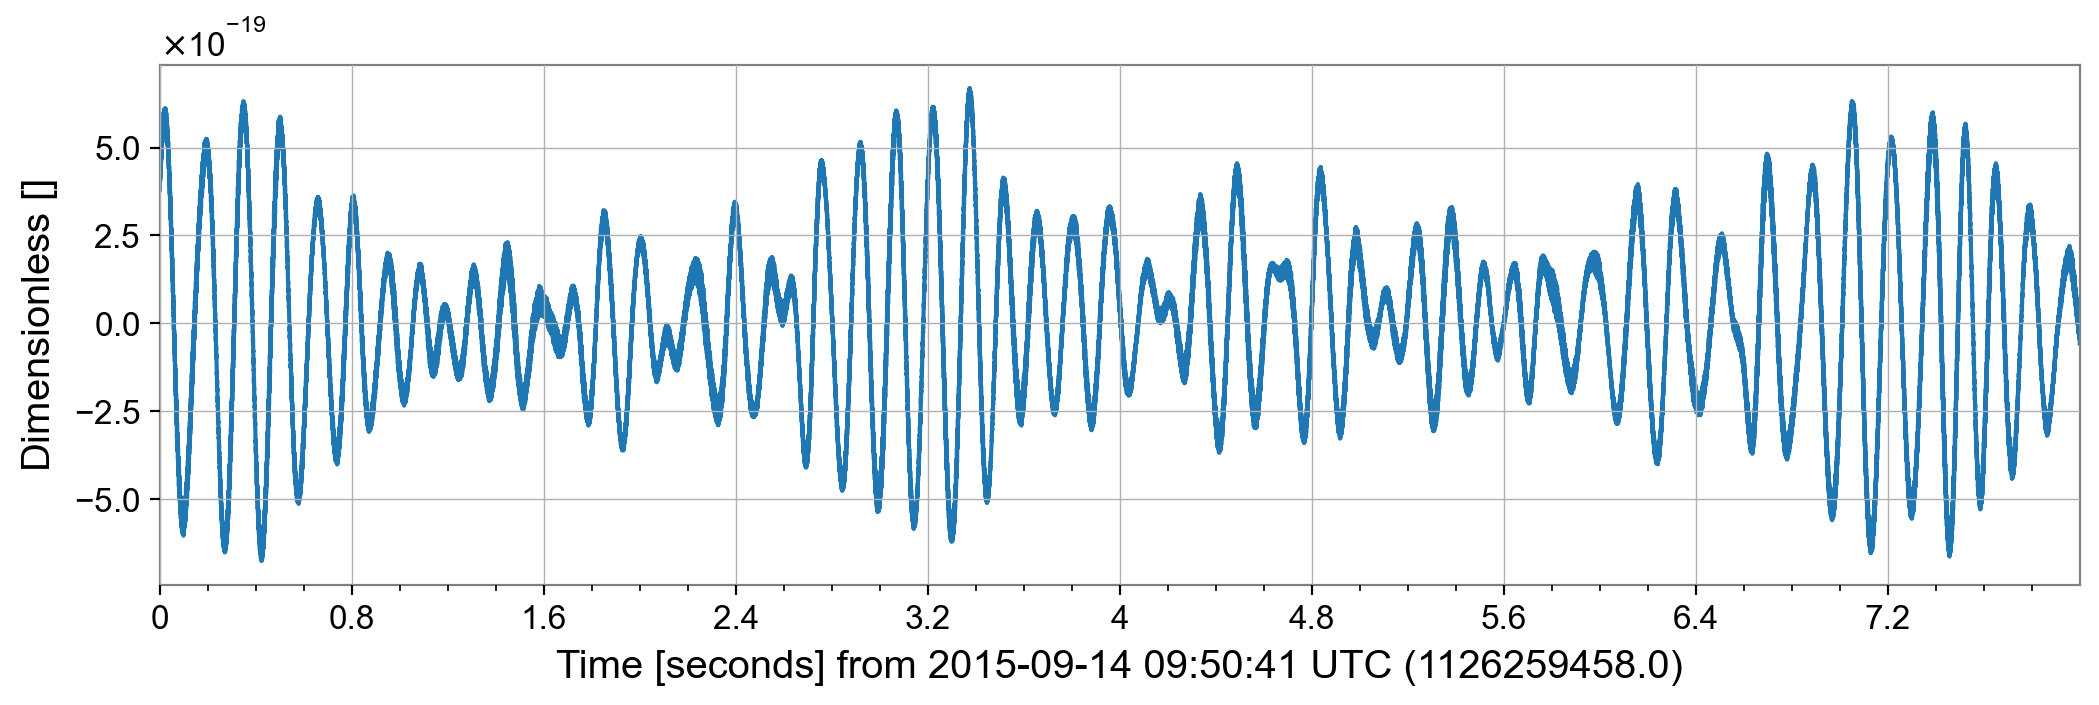

In [3]:
# Plotting strain data

# Calculate the integer value of the GPS time center
center = int(t0)

# Crop the strain data around the center GPS time, 4 seconds before and 4 seconds after
strain = data.crop(center - 4, center + 4)

# Create a figure and plot the cropped strain data
fig1 = strain.plot()

# Print the length of the cropped strain data
print(len(strain))


### Whiten the data, using gwpy

In [4]:
# Whitening the strain data

# Assuming 'strain' is a TimeSeries object representing gravitational wave strain data

# Whitening the strain data using a window of 4 seconds and a step of 2 seconds
white = strain.whiten(4, 2)

### Showing the effect of the whitening

C:\Users\Elena\anaconda3\Lib\site-packages\gwpy\plot\plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


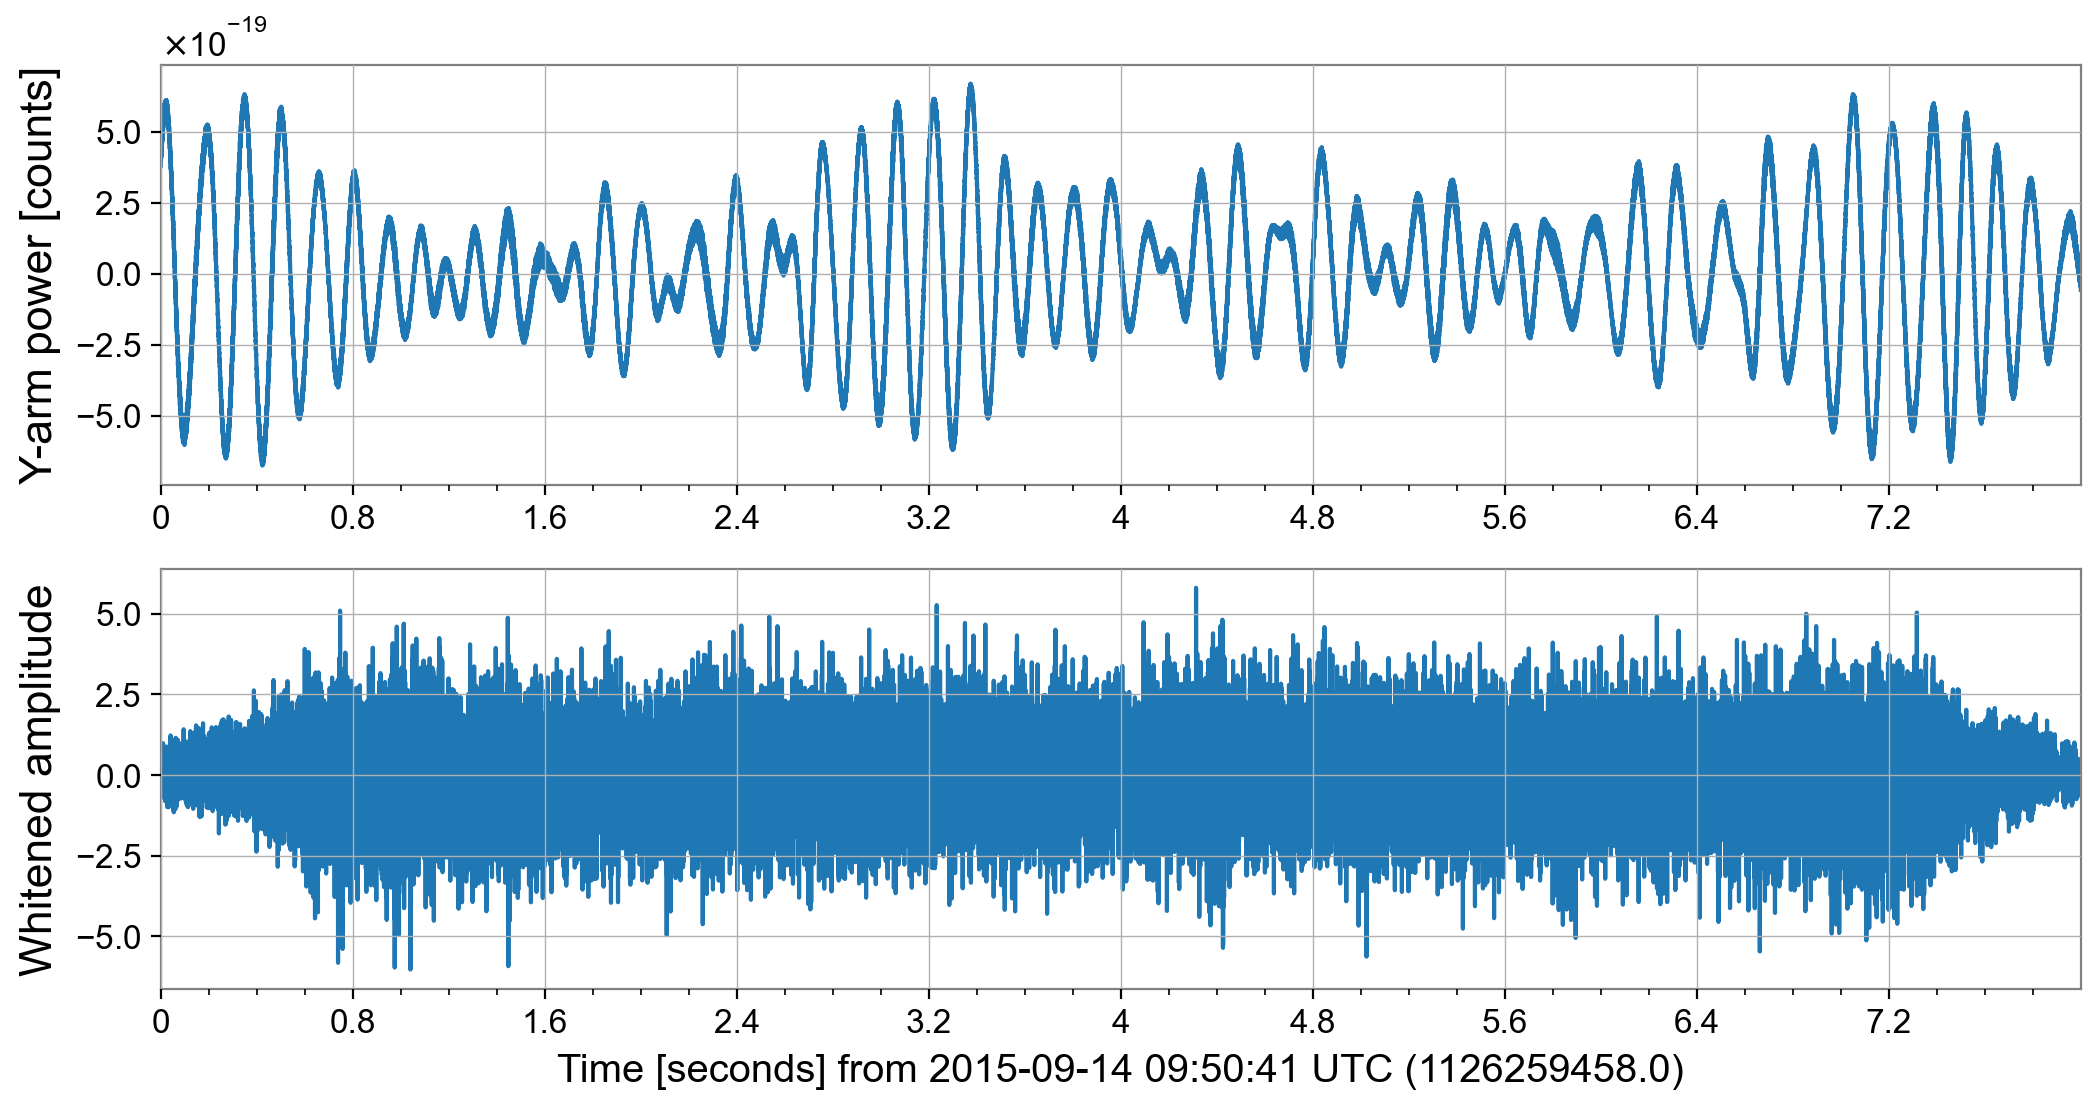

In [5]:
# Creating and displaying a multi-panel plot

# Import the 'Plot' class from the 'gwpy.plot' module
from gwpy.plot import Plot

# Create a multi-panel plot ('plot') with two panels: one for 'strain' data and one for 'white' data
# The 'separate=True' argument creates separate y-axes for each panel
# The 'sharex=True' argument shares the x-axis between the panels
plot = Plot(strain, white, separate=True, sharex=True)

# Set the y-axis label for the first panel (strain data)
plot.axes[0].set_ylabel('Y-arm power [counts]', fontsize=16)

# Set the y-axis label for the second panel (whitened data)
plot.axes[1].set_ylabel('Whitened amplitude', fontsize=16)

# Display the multi-panel plot
plot.show()

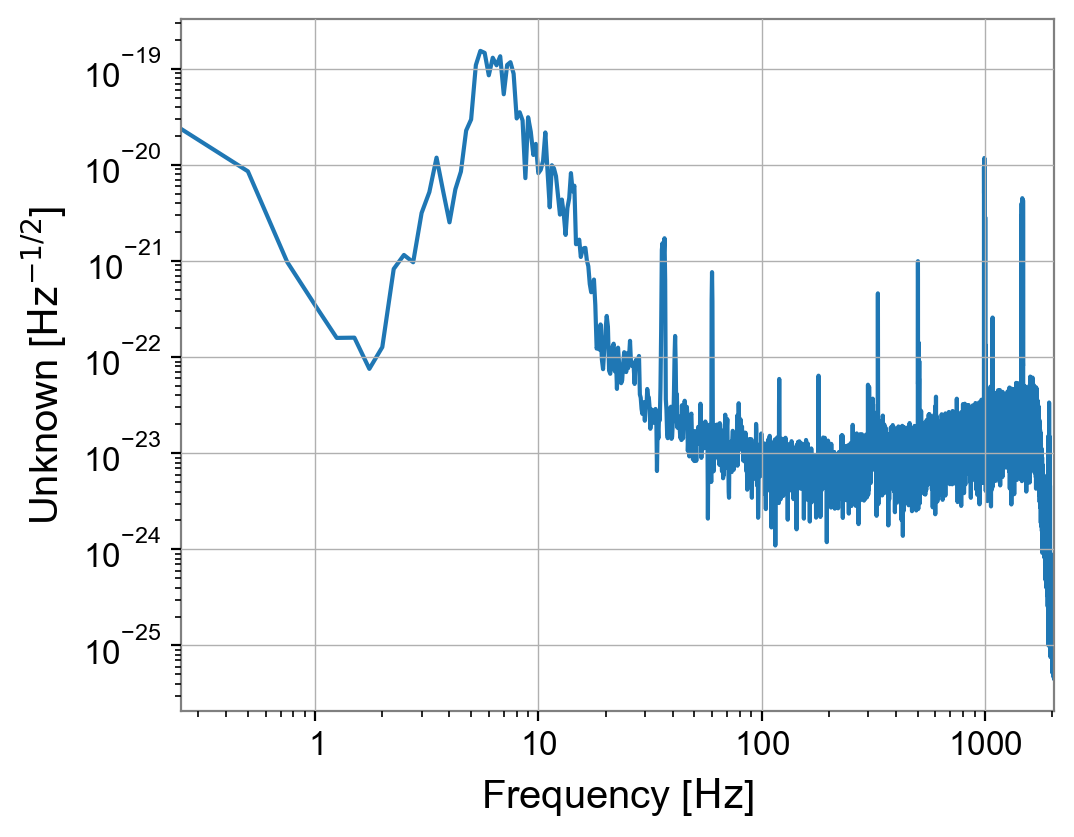

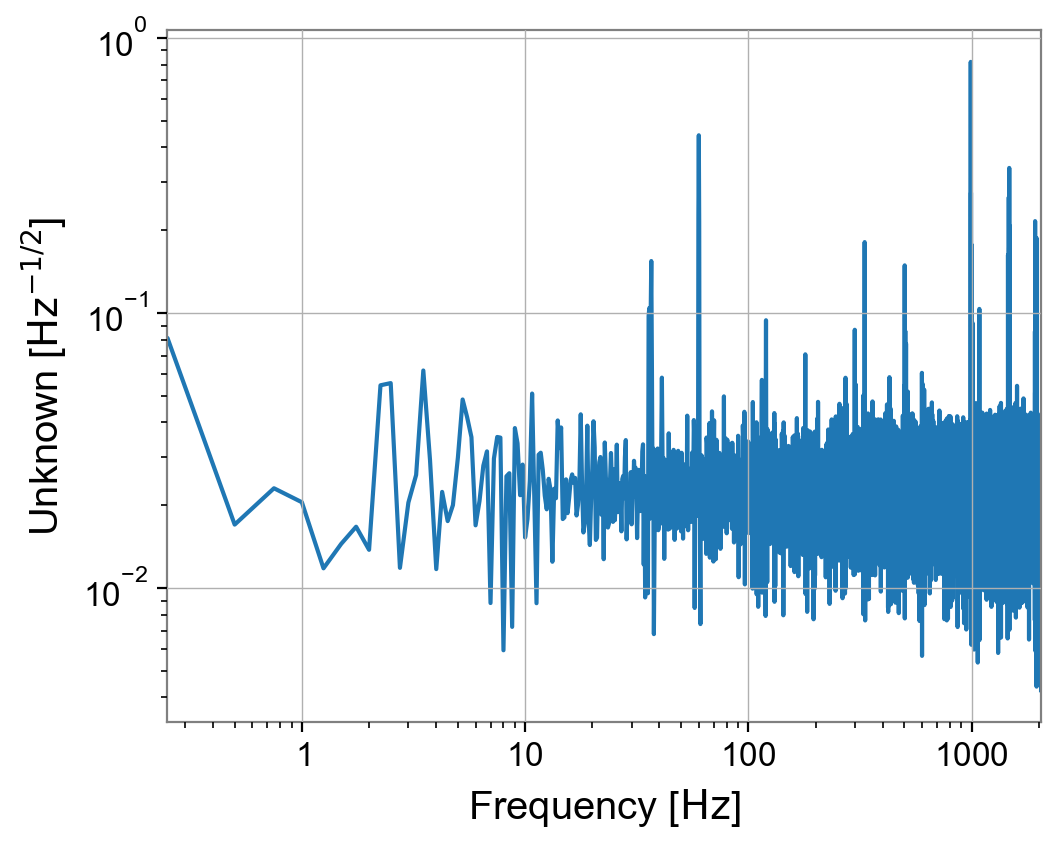

In [6]:
# Plotting Amplitude Spectral Density (ASD)

# Calculate and plot the ASD (Amplitude Spectral Density) of the original 'strain' data
# The 'fftlength=4' argument sets the length of the Fast Fourier Transform (FFT) window to 4 seconds
fig1 = strain.asd(fftlength=4).plot()

# Calculate and plot the ASD of the whitened 'white' data
# The 'fftlength=4' argument sets the length of the FFT window to 4 seconds
fig2 = white.asd(fftlength=4).plot()

# Uncomment the following lines to set custom x-axis and y-axis limits:
# plt.xlim(10, 2000)   # Set custom x-axis limits (frequency range)
# plt.ylim(1e-24, 1e-19)   # Set custom y-axis limits (ASD values)

### Q-Transform Plot

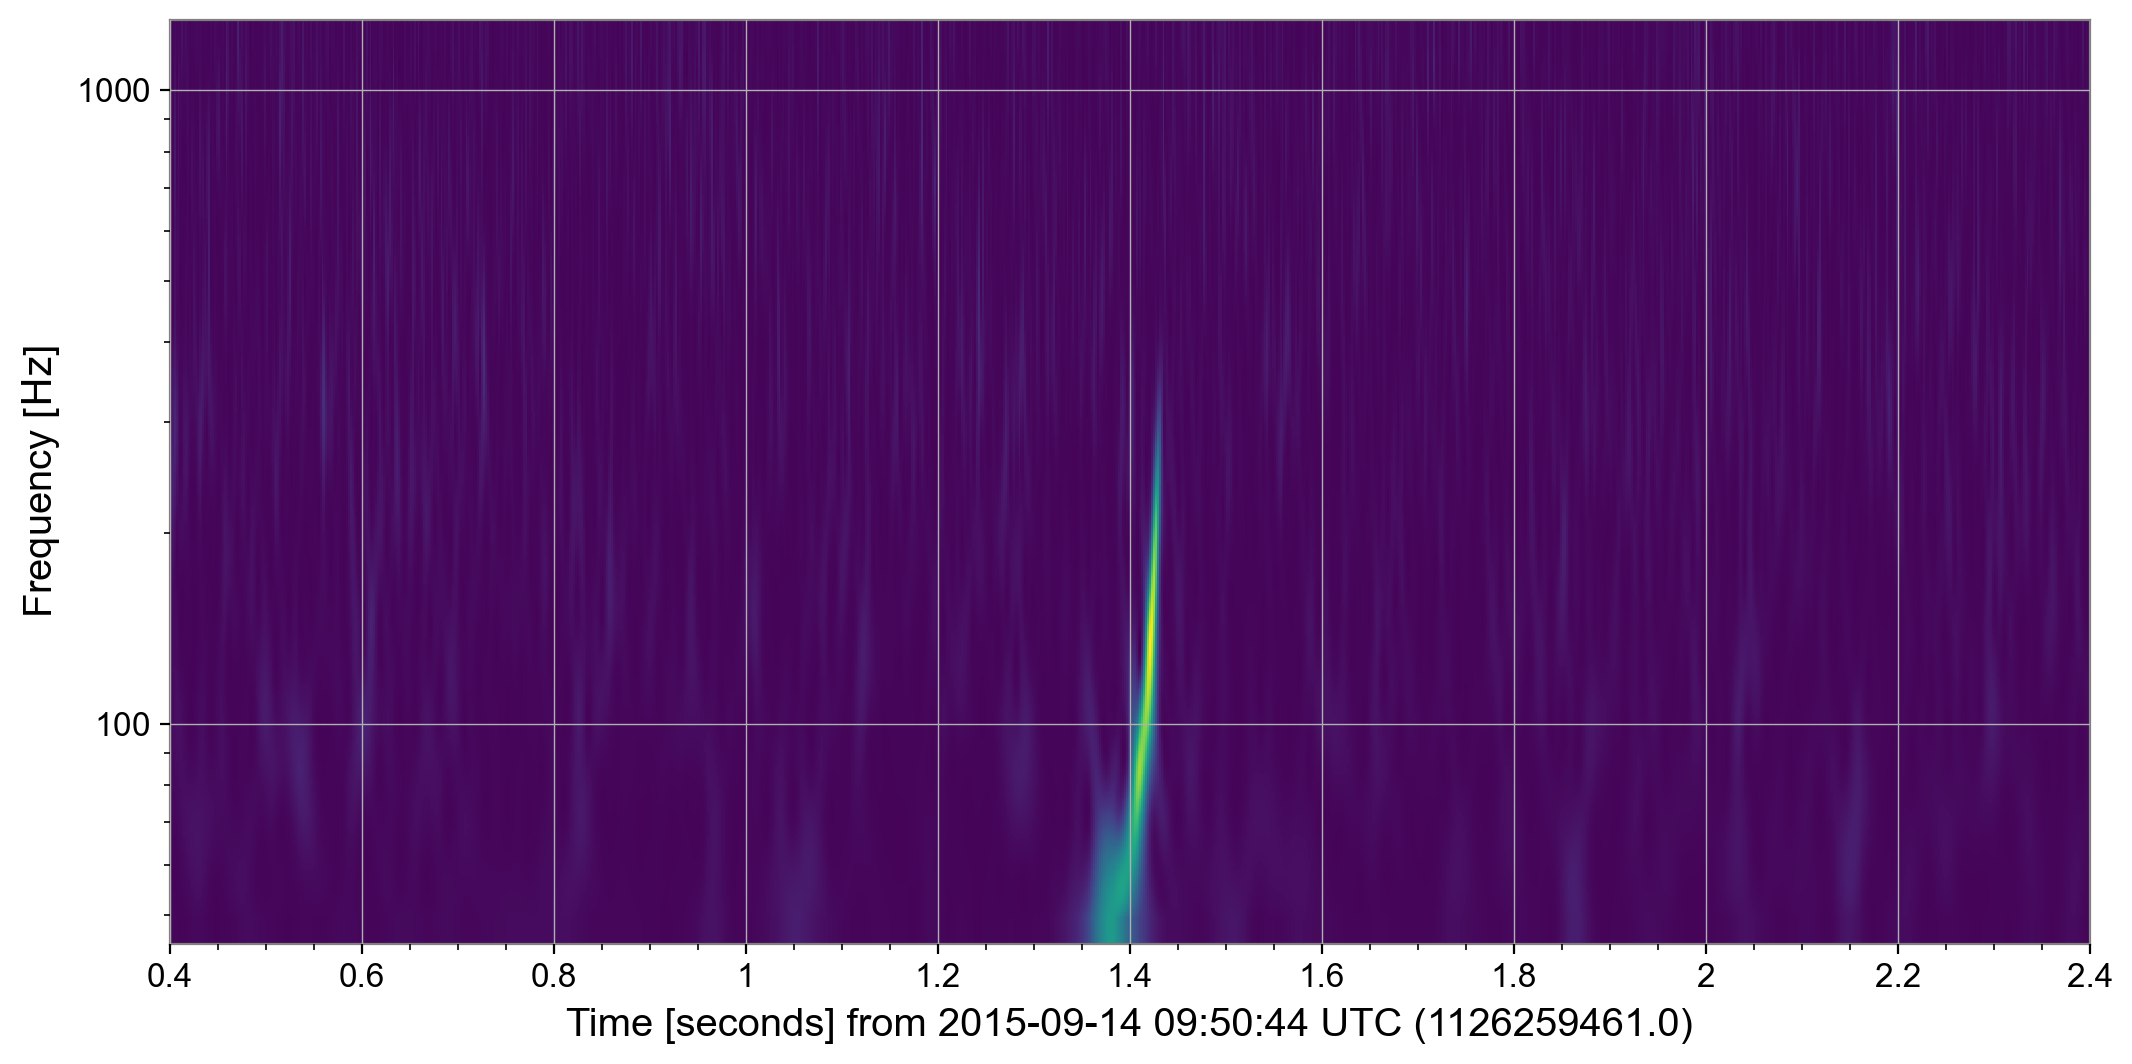

In [7]:
# Q-Transform Plot

# Set the width of the q-transform plot in seconds
dt = 1

# Calculate the Q-transform of the whitened 'white' data for a specified time segment
hq = white.q_transform(outseg=(t0 - dt, t0 + dt))

# Create a figure ('fig4') and plot the Q-transform
fig4 = hq.plot()

# Uncomment the following lines to customize the plot further:

# # Get the current axis of the figure
# plt = fig4.gca()

# # Add a colorbar to the plot with a label
# fig4.colorbar(label="Normalized energy")

# # Turn off grid lines
# plt.grid(False)

# Set the y-axis scale to logarithmic
plt.yscale('log')

## Implement the whitening using AR model

### Reading a large dataset from disk

In [8]:
# Import necessary libraries

# Import the 'h5py' library for reading HDF5 data
import h5py

# Import 'numpy' for numerical operations
import numpy as np

# Import 'matplotlib.pyplot' for plotting
import matplotlib.pyplot as plt

# Import 'statsmodels.api' for statistical modeling
import statsmodels.api as sm

# Import 'scipy.signal' for signal processing
from scipy import signal

# Import 'LogNorm' from 'matplotlib.colors' for log-scaled color representation
from matplotlib.colors import LogNorm

# Define the path to the HDF5 data file
data_file = "../../data/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5"

# Open the HDF5 data file for reading (read mode: "r")
h5 = h5py.File(data_file, "r")
 

In [9]:
# Depending on the Python type, you might have to convert the output to the list
list(h5.keys())

['meta', 'quality', 'strain']

In [10]:
strain = np.array(h5["strain"]["Strain"])

In [11]:
list(h5["meta"].keys())

['Description',
 'DescriptionURL',
 'Detector',
 'Duration',
 'GPSstart',
 'Observatory',
 'Type',
 'UTCstart']

In [12]:
# In GPS time
gps_start=1126257415
gps_end=1126261511

In [13]:
h5.close()

In [14]:
fs = 4096

### Choice the data set for estimate AR parameters

In [15]:
 # Let's create gps time vector
gps_time = np.linspace(gps_start, gps_end, 4096*fs)
gps_start_event = 1126259462.4
 # Let's search for the starting index of the GW event
gw_event_start_id = np.where(np.round(gps_time) == round(gps_start_event))[0][0]
 # Let's take two seconds of the data to show the GW
strain_gw = strain[gw_event_start_id:(gw_event_start_id+int(1.5*fs))]
time_gw = gps_time[gw_event_start_id:(gw_event_start_id+int(1.5*fs))] 

Text(0.5, 1.0, 'GW150914 - raw strain')

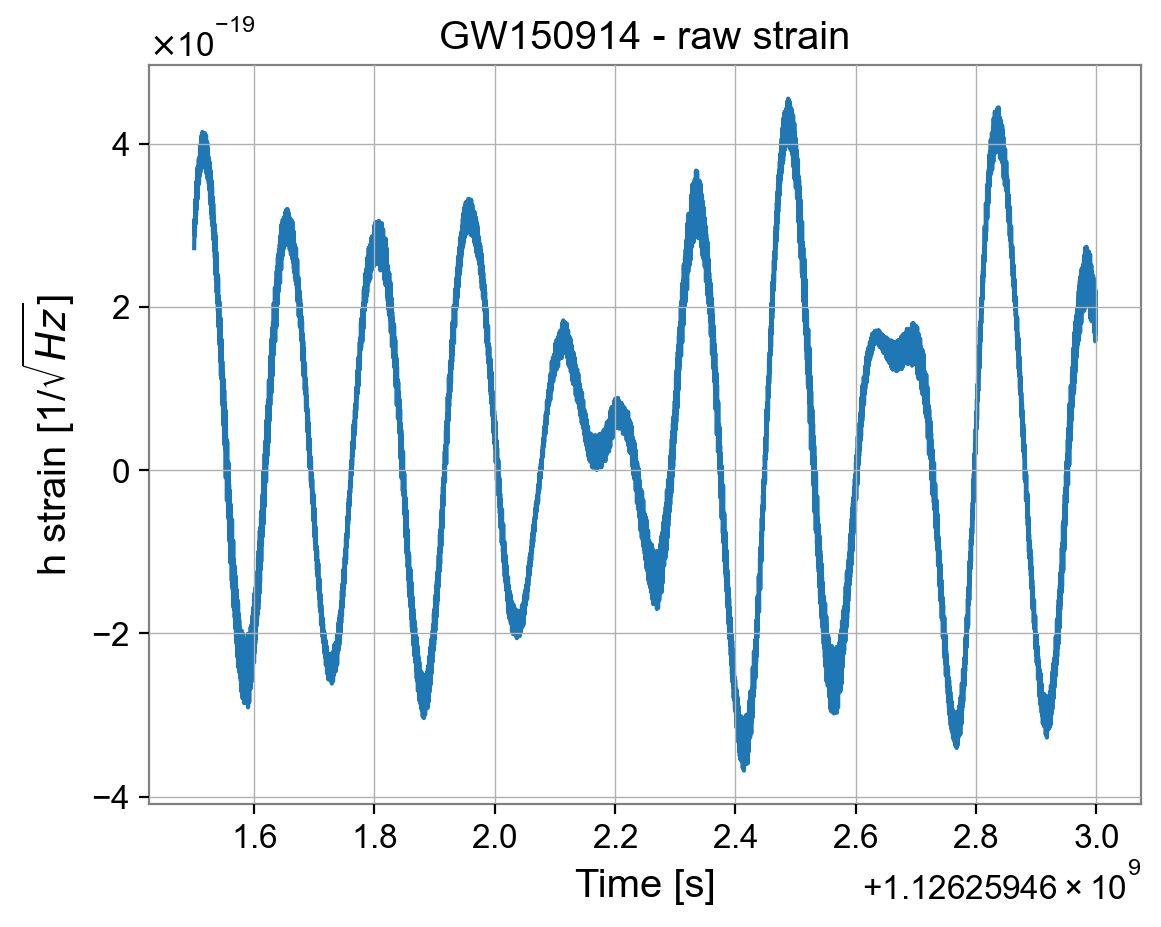

In [16]:
plt.plot(time_gw, strain_gw)
plt.xlabel("Time [s]")
plt.ylabel(r'h strain [1/$\sqrt{Hz}$]')
plt.title("GW150914 - raw strain")

In [17]:
# Let's now take the noise to create the model whitening the data; 300 seconds of noise should be enough
strain_noise = strain[1200*fs:1500*fs]
time_noise = gps_time[1200*fs:1500*fs]

### Create the AR model

In [18]:
# Import the 'statsmodels.api' library as 'sm'
import statsmodels.api as sm

# Define a function named 'whitenEstimate' that takes three parameters: 'data', 'N', and 'rhoin'
def whitenEstimate(data, N, rhoin):
    # Initialize a list 'X' with values ranging from 0 to N-1
    X = range(0, N)
    
    # Add a constant term to 'X' for the intercept in the linear model
    X = sm.add_constant(X)
    
    # Create a GLSAR (Generalized Least Squares with Autoregressive Errors) model 'ARwhiten'
    ARwhiten = sm.GLSAR(data[:N], X, rho=rhoin)
    
    # Iteratively estimate the autoregressive coefficients and sigma (residual standard deviation)
    for i in range(100):
        # Fit the GLSAR model to the data
        results = ARwhiten.fit()
        
        # Estimate the autoregressive coefficients (rho) and sigma from the residuals
        rho, sigma = sm.regression.linear_model.burg(results.resid, order=ARwhiten.order)
        
        # Update the GLSAR model with the new estimated rho value
        ARwhiten = sm.GLSAR(data[:N], X, rho)
    
    # Create an array 'dataw' filled with zeros of the same length as 'data'
    dataw = np.zeros(len(data))
    
    # Whiten the original 'data' using the trained GLSAR model 'ARwhiten'
    dataw = ARwhiten.whiten(data)
    
    # Return the whitened data 'dataw'
    return dataw



### Whiten the data

In [19]:
# Get the length of the 'strain_gw' time series and store it in 'N'
N = len(strain_gw)

# Create a list 'X' with values ranging from 0 to N-1
X = range(0, N)

# Add a constant term (intercept) to the list 'X' using 'sm.add_constant'
X = sm.add_constant(X)

# Set the initial value of the autoregressive coefficient 'rhoin' to 1000
rhoin = 1000

# Call the 'whitenEstimate' function to whiten the 'strain_gw' data
# Pass 'strain_gw', 'N', and 'rhoin' as arguments to the function
yw = whitenEstimate(strain_gw, N, rhoin)


### Show the effect of AR whitening

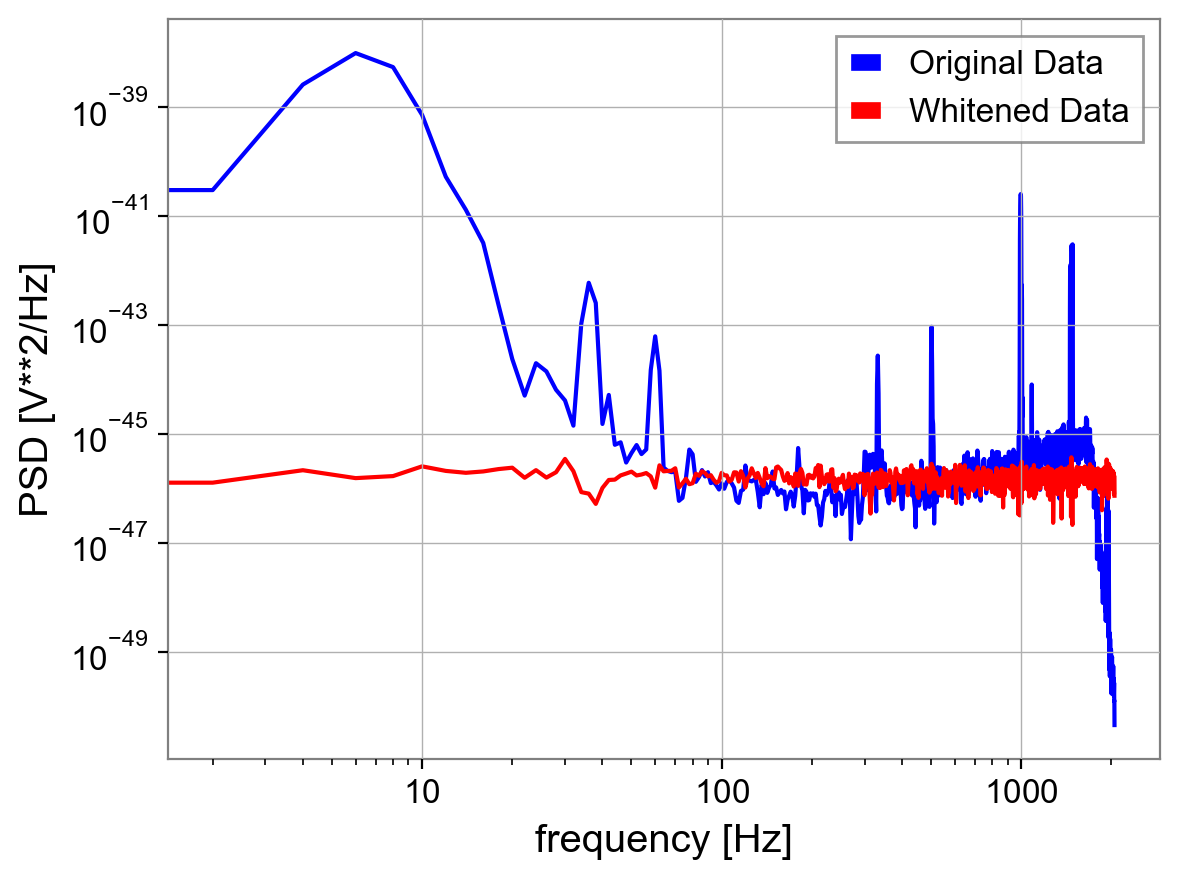

In [20]:
# Import the 'signal' module from 'scipy'
from scipy import signal

# Define the sampling frequency 'fs' as 4096 Hz
fs = 4096

# Calculate the power spectral density (PSD) of the 'strain_gw' data using Welch's method
# 'nperseg=2048' specifies the number of data points in each segment of the data for analysis
f, Pxx_den = signal.welch(strain_gw, fs=fs, nperseg=2048)

# Calculate the PSD of the whitened data 'yw' using Welch's method
f, Pxx_ar = signal.welch(yw, fs=fs, nperseg=2048)

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Create a log-log plot of the PSD of 'strain_gw' in blue ('b')
ax.loglog(f, Pxx_den, 'b', label='Original Data')

# Create a log-log plot of the PSD of 'yw' (whitened data) in red ('r')
ax.loglog(f, Pxx_ar, 'r', label='Whitened Data')

# Set the x-axis label to 'frequency [Hz]'
plt.xlabel('frequency [Hz]')

# Set the y-axis label to 'PSD [V**2/Hz]'
plt.ylabel('PSD [V**2/Hz]')

# Display a legend indicating the data represented by the colors
plt.legend()

# Show the plot
plt.show()

In [21]:
# Import necessary libraries and modules
import matplotlib.pyplot as plt
import IPython
import IPython.display
import matplotlib as mpl
from matplotlib import cm
from scipy import signal
from matplotlib.colors import LogNorm
from PIL import Image

# Set matplotlib configuration parameters
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# Import NumPy library
import numpy as np

# Import additional libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.colors import LogNorm

def prepareImage(y, fs, title):
    """
    Create and display a spectrogram plot using the Short-Time Fourier Transform (STFT).

    Parameters:
        y (numpy.ndarray): Signal data.
        fs (float): Sampling frequency.
        title (str): Title for the plot.

    Returns:
        None
    """
    # Calculate the spectrogram using the Short-Time Fourier Transform (STFT)
    f, t, Sxx = signal.spectrogram(y, fs)
    
    # Create a pseudocolor mesh plot using the spectrogram data
    plt.pcolormesh(t, f, Sxx, cmap='viridis', shading='gouraud', alpha=0.95)
    
    # Set the y-axis scale to logarithmic
    plt.yscale('log')
    
    # Set the y-axis limits to be between 10 Hz and half of the sampling frequency
    plt.ylim(10, fs/2)
    
    # Set the title for the plot
    plt.title(str(title))
    
    # Set labels for the x and y axes
    plt.xlabel('Time (secs)')
    plt.ylabel('Frequency (Hz)')
    
    # Add a colorbar to the plot for visualization
    plt.colorbar()
    
    # Display the spectrogram plot
    plt.show()


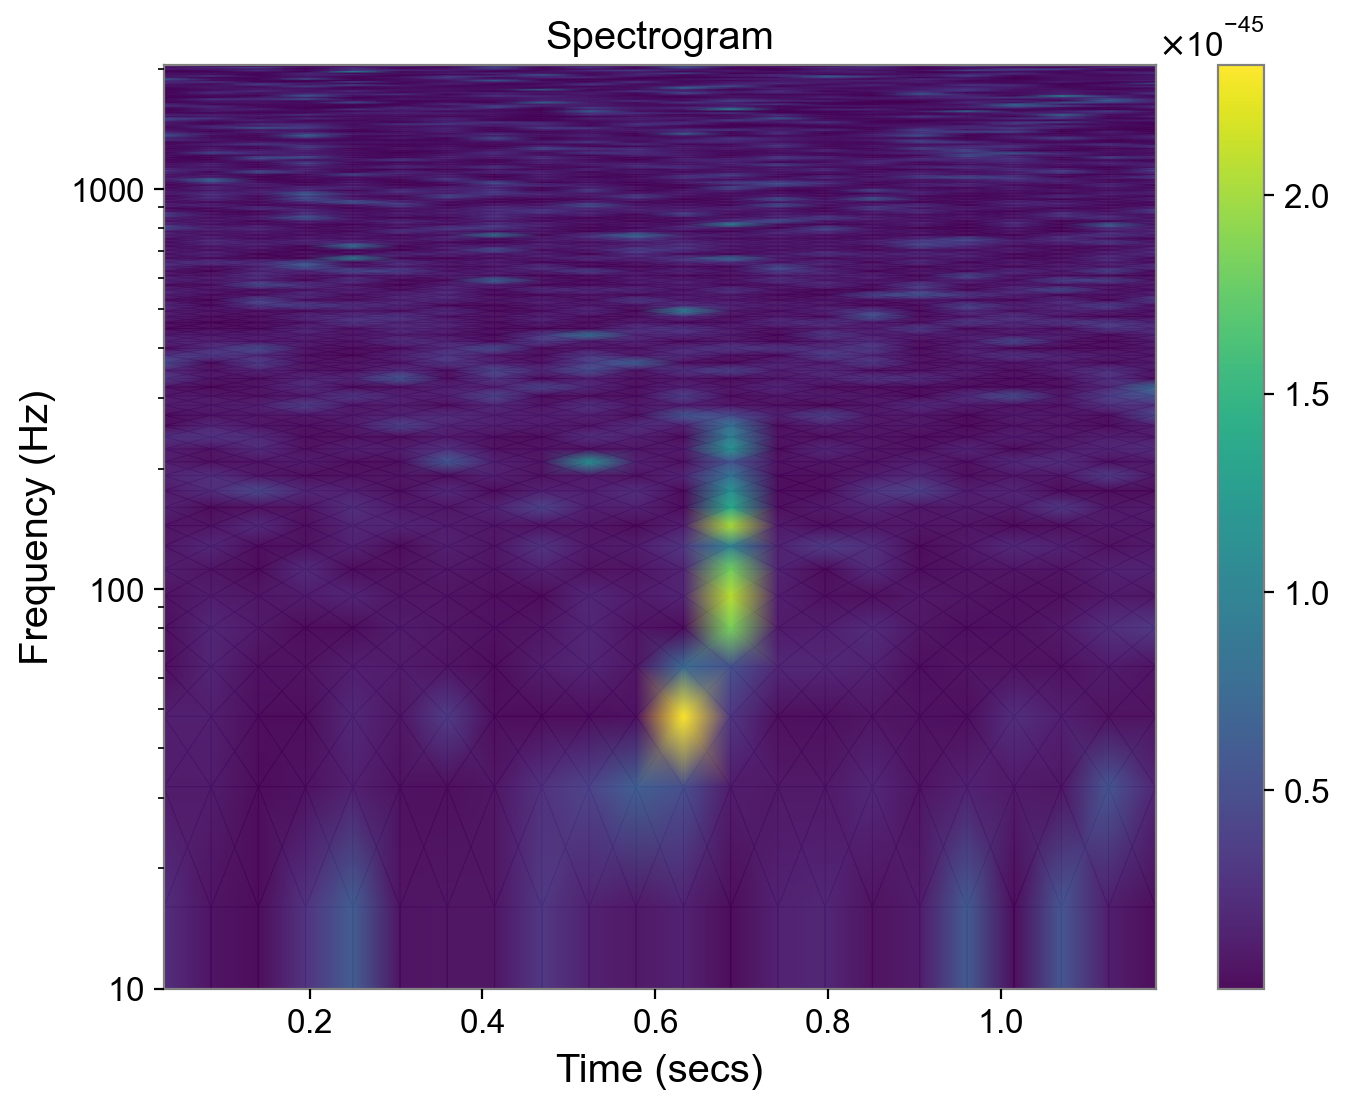

In [22]:
 
prepareImage(yw,fs=4096,title="Spectrogram")

### plt Wavelet map for whitened data

In [23]:
def prepareImage_cwt(y, fs, title="title"):
    """
    Create and display a Continuous Wavelet Transform (CWT) spectrogram plot.

    Parameters:
        y (numpy.ndarray): Signal data.
        fs (float): Sampling frequency.
        title (str, optional): Title for the plot (default is "title").

    Returns:
        None
    """
    # Define the scale parameter 'w' for the Morlet wavelet
    w = 6.
    
    # Create an array 'freq' representing frequencies from 1 Hz to Nyquist frequency (fs/2)
    freq = np.linspace(1, fs/2, int(fs/2))
    
    # Calculate the wavelet widths using the scale 'w' and frequencies
    widths = w * fs / (2 * freq * np.pi)
    
    # Calculate the Continuous Wavelet Transform (CWT) of the signal and obtain the squared magnitude
    z = np.abs(signal.cwt(y, signal.morlet2, widths, w=w))**2
    
    # Create an array 'x' representing time values (indices)
    x = np.arange(0, len(y))
    
    # Create a pseudocolor mesh plot using the CWT spectrogram data
    plt.pcolormesh(x, freq, z, cmap='Spectral', shading='gouraud', alpha=0.95, norm=LogNorm())
    
    # Set the y-axis scale to logarithmic
    plt.yscale('log')
    
    # Set the y-axis limits between 1 Hz and the Nyquist frequency (fs/2)
    plt.ylim(1, fs/2)
    
    # Set the title for the plot
    plt.title(str(title))
    
    # Display the CWT spectrogram plot
    plt.show()


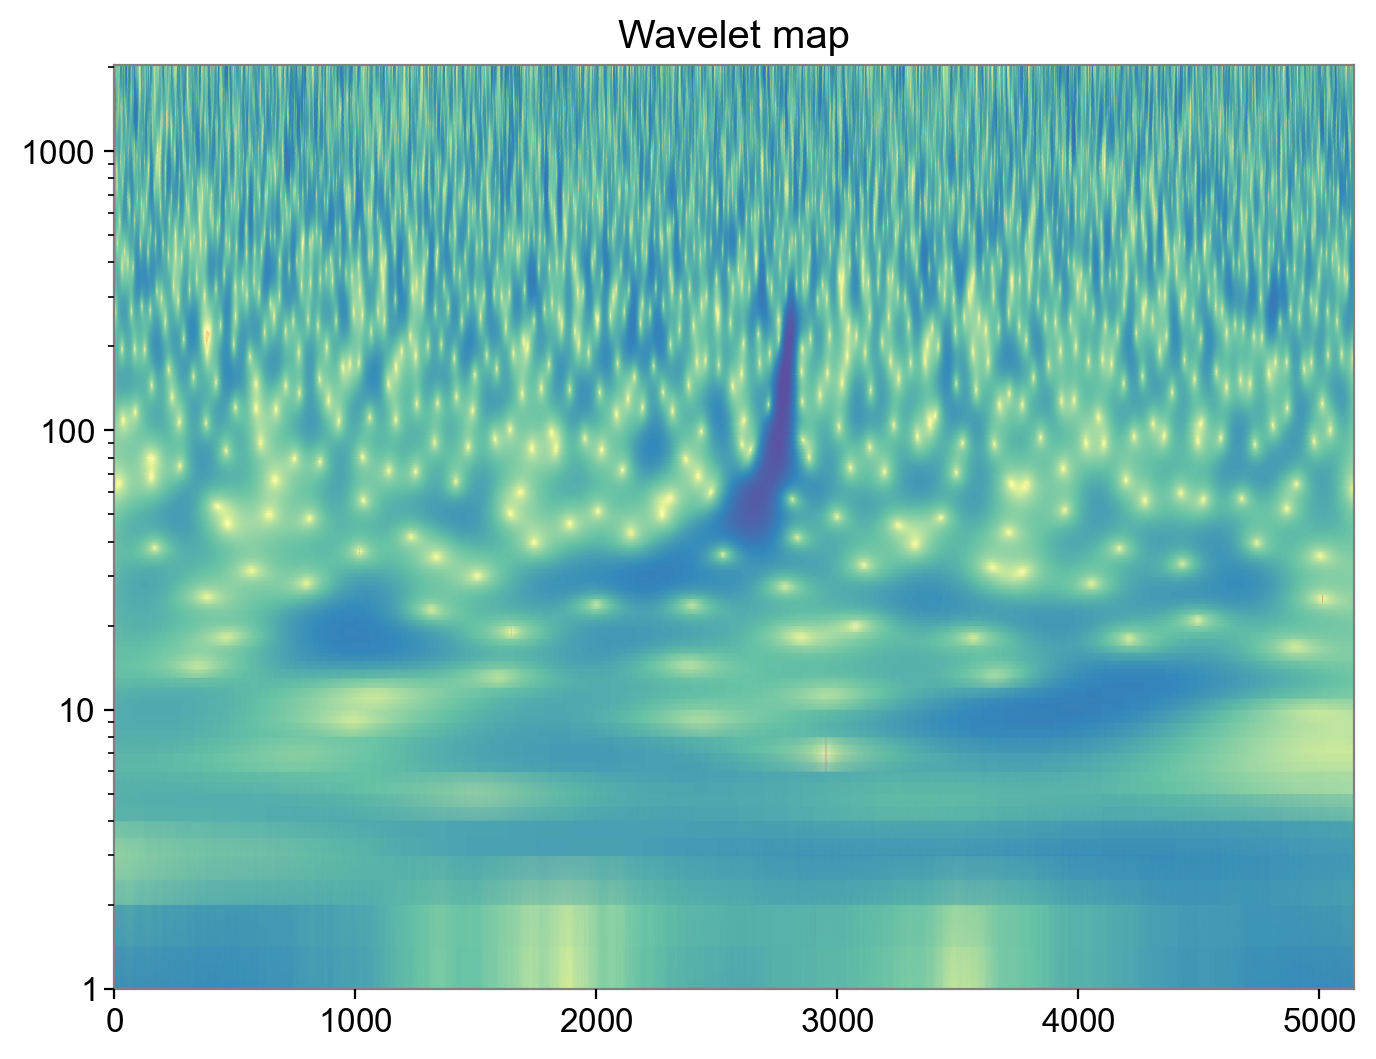

In [24]:
prepareImage_cwt(yw,fs,"Wavelet map")